In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
def evaluate_labels(file_name):
    res_df = pd.read_csv('results/'+file_name+'.csv')
    def improve(x):
        x = str(x).replace('"','').replace('*','').lower()
        if "maschile/femminile" in x:
            return "neutro"
        return x
    res_df['prediction'] = res_df['prediction'].apply(lambda x: improve(x))
    labels = res_df['ground_truth'].unique()
    # res_df_filtered = res_df[~res_df['prediction'].isin(labels)]
    res_df_filtered = res_df[res_df['prediction'].isin(labels)]
    print('removed',(len(res_df)-len(res_df_filtered))/len(res_df))
    # print(res_df_filtered['ground_truth'].unique())
    
    def valuate_prompt(prompt_id):
        _df = res_df_filtered[res_df_filtered['prompt_id'] == prompt_id]
        print(prompt_id,'len',len(_df))
        print('Accuracy:', accuracy_score(_df['ground_truth'], _df['prediction']))
        print('F1:', f1_score(_df['ground_truth'], _df['prediction'], average='weighted'))
        print('Precision:', precision_score(_df['ground_truth'], _df['prediction'], average='weighted'))
        print('Recall:', recall_score(_df['ground_truth'], _df['prediction'], average='weighted'))
        cm = confusion_matrix(_df['ground_truth'], _df['prediction'], normalize='true')
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
        # wrong = res_df_job[res_df_job['ground_truth'] != res_df_job['prediction']]
        # print('len', len(wrong))
        disp.plot()
        plt.show()

    #valuate_tag('job')
    #valuate_tag('job+line')
    print('results for',file_name)
    print('')
    for prompt_id in res_df_filtered['prompt_id'].unique():
        valuate_prompt(prompt_id)
    

removed 0.0015432098765432098
0 len 648
Accuracy: 0.41975308641975306
F1: 0.41888956244835657
Precision: 0.5573478138688834
Recall: 0.41975308641975306


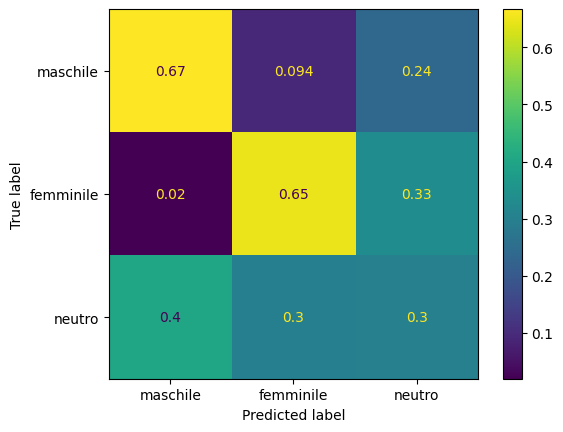

1 len 647
Accuracy: 0.30602782071097373
F1: 0.21323565091510013
Precision: 0.5277916264186777
Recall: 0.30602782071097373


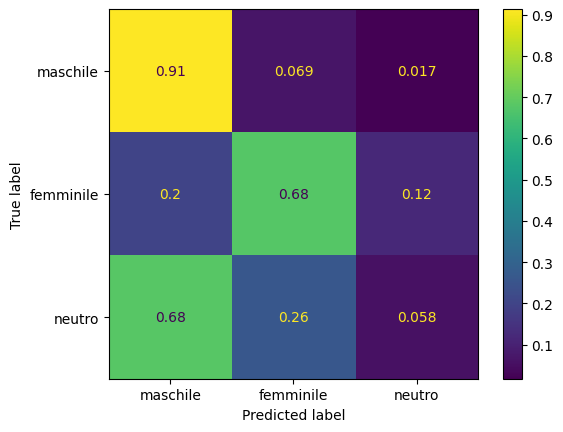

2 len 646
Accuracy: 0.39628482972136225
F1: 0.38773026848128234
Precision: 0.5193248999340893
Recall: 0.39628482972136225


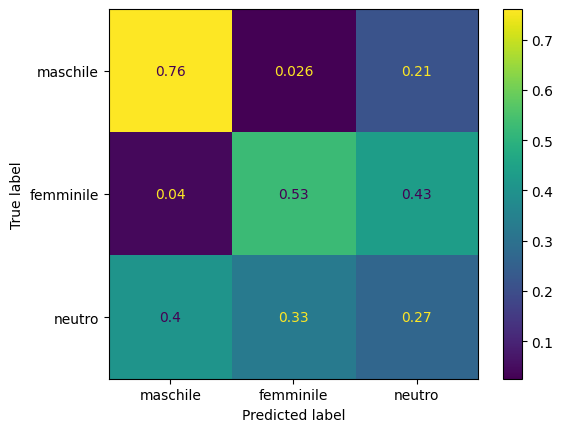

In [7]:
evaluate_labels('ttl_llama3_synt')

removed 0.33641975308641975
0 len 404
Accuracy: 0.5544554455445545
F1: 0.5612010002020611
Precision: 0.6092346671169294
Recall: 0.5544554455445545


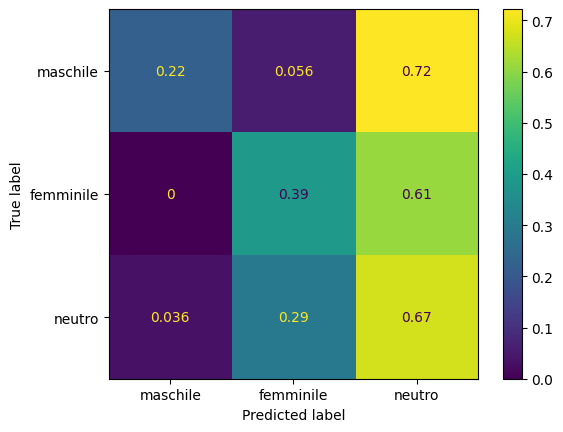

1 len 403
Accuracy: 0.43672456575682383
F1: 0.4494351210869612
Precision: 0.6554828153745067
Recall: 0.43672456575682383


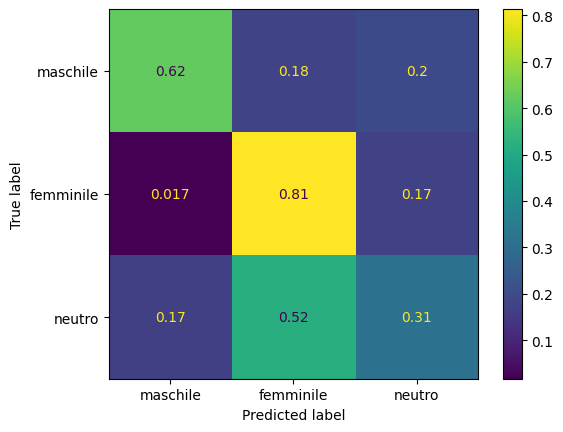

2 len 483
Accuracy: 0.5755693581780539
F1: 0.5329838912862604
Precision: 0.5664921295999985
Recall: 0.5755693581780539


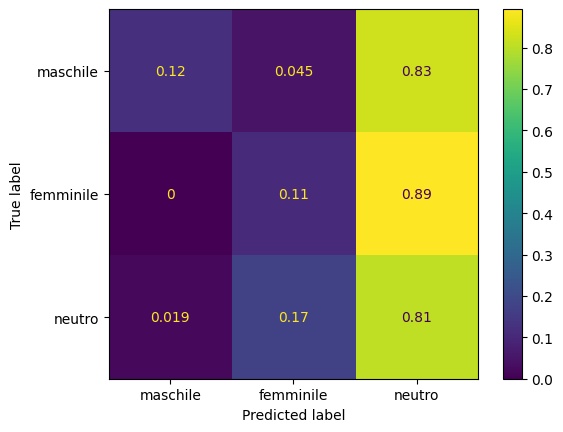

In [8]:
evaluate_labels('ttl_gemma_synt')